In [25]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from skimage.feature import hog
import os
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import cv2

In [26]:
'''
Authenticate
Authenticates your credentials and creates a client.
'''
os.environ["VISION_ENDPOINT"] = "..."
os.environ["VISION_KEY"] = "..."
subscription_key = os.environ["VISION_ENDPOINT"]
endpoint = os.environ["VISION_KEY"]
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'\nEND - Authenticate\n'

In [27]:
def extract_features(folder, computervision_client):
    features = []
    labels = []

    for filename in os.listdir(folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder, filename)
            
            with open(image_path, "rb") as img_file:
                result = computervision_client.analyze_image_in_stream(img_file, visual_features=['Tags'])
                
                is_bike = any(tag.name.lower() in ['bike', 'bicycle'] for tag in result.tags)
                    
                features.append(len(result.tags))
                labels.append(1 if is_bike else 0)
            # with open(image_path, "rb") as img_file:
            #     result = computervision_client.analyze_image_in_stream(img_file, visual_features=[VisualFeatureTypes.objects])
            #     features.append(len(result.objects))
    
    return np.array(features).reshape(-1, 1), np.array(labels)

bikes_folder = "bikes"
bikes_images = os.listdir(bikes_folder)

features, gtruth_labels = extract_features(bikes_folder, computervision_client)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(features, gtruth_labels)

predicted_labels = svm_classifier.predict(features)

print(gtruth_labels)
print(predicted_labels)


[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0]


In [18]:
def evaluate_classification(gtruth_labels, predicted_labels):
    # Calculating evaluation metrics
    accuracy = accuracy_score(gtruth_labels, predicted_labels)
    precision = precision_score(gtruth_labels, predicted_labels)
    recall = recall_score(gtruth_labels, predicted_labels)
    f1 = f1_score(gtruth_labels, predicted_labels)
    conf_matrix = confusion_matrix(gtruth_labels, predicted_labels)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(conf_matrix)

evaluate_classification(gtruth_labels, predicted_labels)

Accuracy: 0.75
Precision: 0.8571428571428571
Recall: 0.6
F1 Score: 0.7058823529411765
Confusion Matrix:
[[9 1]
 [4 6]]


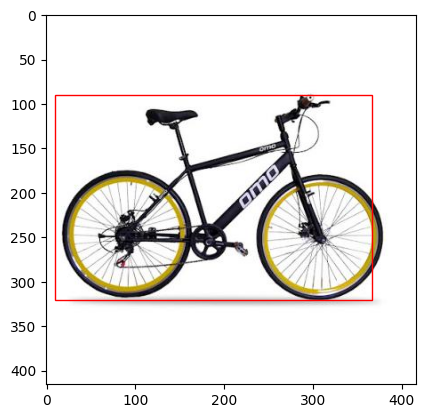

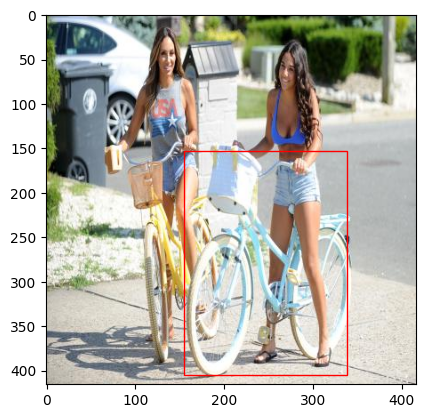

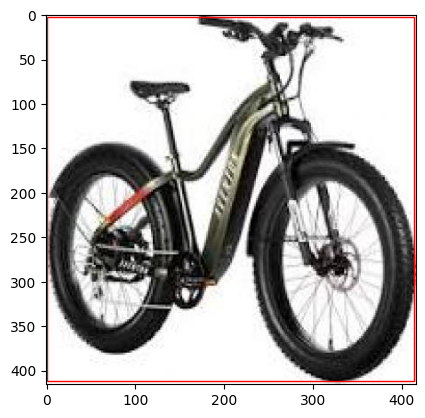

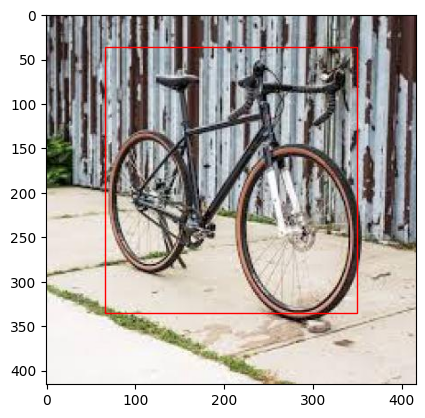

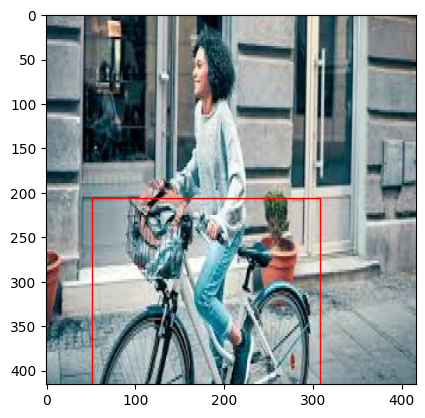

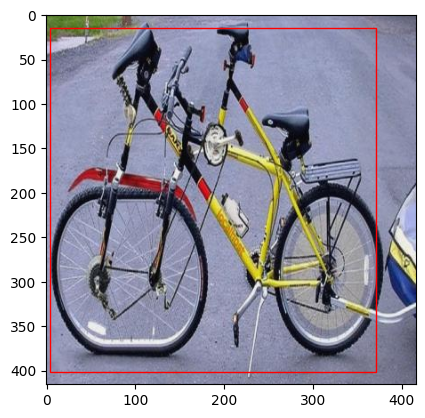

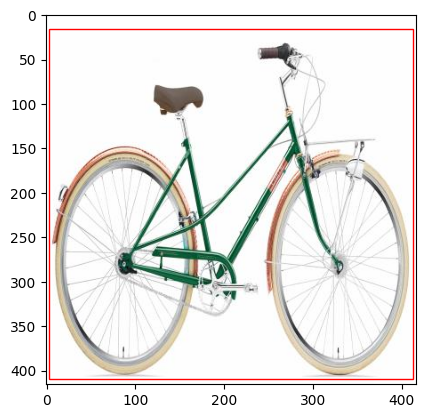

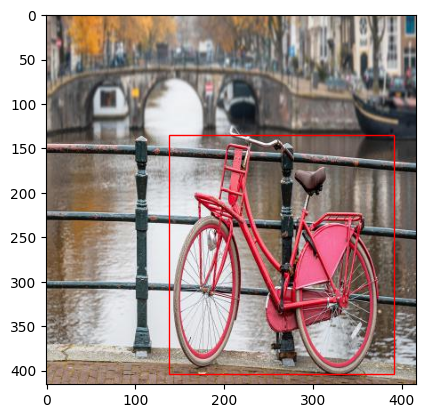

In [20]:
predicted_boxes = []
# bikes_folder = "bikes"
for image_file in bikes_images:
    image_path = os.path.join(bikes_folder, image_file)
    with open(image_path, "rb") as img_file:
        result = computervision_client.analyze_image_in_stream(img_file, visual_features=[VisualFeatureTypes.objects])
        ok = 0
        for ob in result.objects:
            if ob.object_property == "bicycle":
                ok = 1
                im = plt.imread(image_path)
                fig, ax = plt.subplots()
                ax.imshow(im)
        
                predicted_bike_bb = [ob.rectangle.x, ob.rectangle.y, ob.rectangle.x + ob.rectangle.w, ob.rectangle.y + ob.rectangle.h]
                
                rect = plt.Rectangle((predicted_bike_bb[0], predicted_bike_bb[1]),
                                     width=predicted_bike_bb[2] - predicted_bike_bb[0],
                                     height=predicted_bike_bb[3] - predicted_bike_bb[1],
                                     edgecolor='r', linewidth=1, fill=False)
                ax.add_patch(rect)

                predicted_boxes.append(predicted_bike_bb)
        if ok == 0 and image_file.startswith('bike'):
            predicted_boxes.append([0, 0, 0, 0])
        
        plt.show()

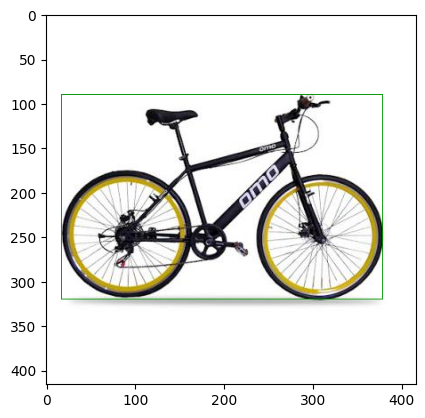

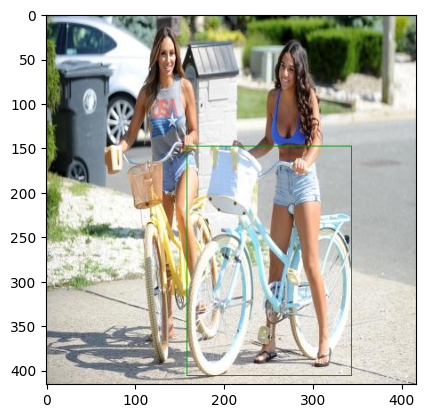

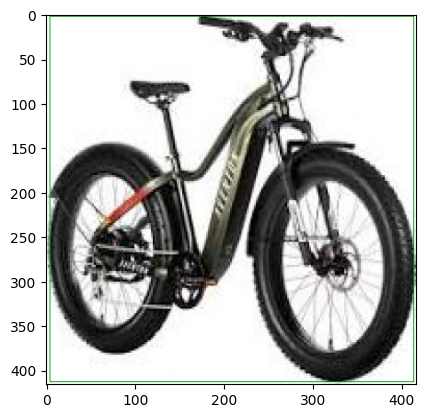

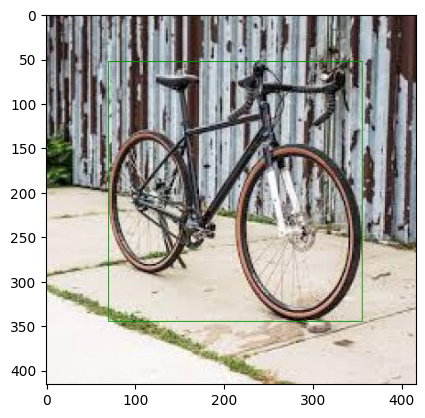

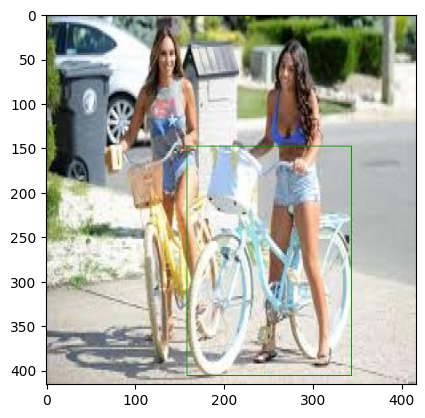

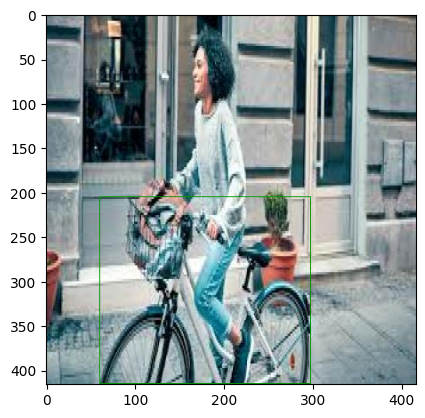

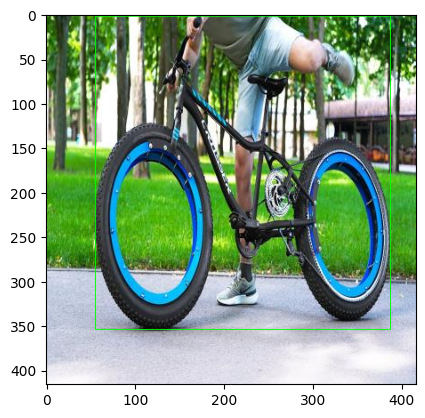

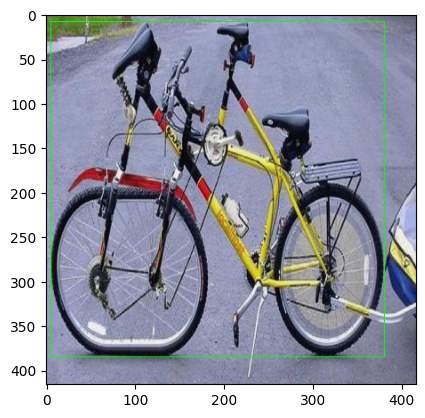

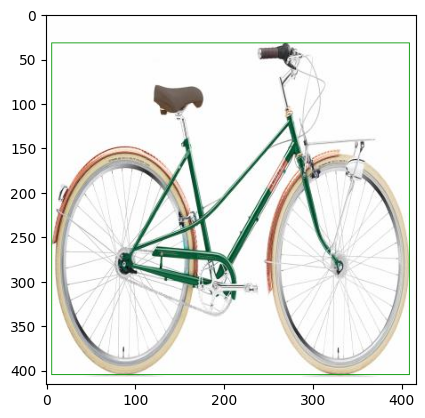

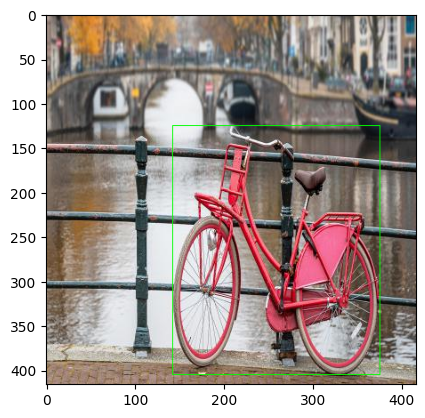

In [21]:
bike_images = [file for file in os.listdir(bikes_folder) if file.startswith("bike")]

gtruth_boxes = []


for image_name in bike_images:
    image_path = os.path.join(bikes_folder, image_name)
    image = cv2.imread(image_path)

    if image_name == "bike1.jpg":
        gtruth_boxes.append((6, 32, 408, 405))
        cv2.rectangle(image, (6, 32), (408, 405), (0, 150, 0), 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
    elif image_name == "bike02.jpg":
        gtruth_boxes.append((17, 90, 378, 320))
        cv2.rectangle(image, (17, 90), (378, 320), (0, 150, 0), 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
    elif image_name == "bike03.jpg":
        gtruth_boxes.append((158, 148, 343, 406))
        cv2.rectangle(image, (158, 148), (343, 406), (0, 150, 0), 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
    elif image_name == "bike04.jpg":
        gtruth_boxes.append((4, 2, 413, 413))
        cv2.rectangle(image, (4, 2), (413, 413), (0, 150, 0), 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
    elif image_name == "bike05.jpg":
        gtruth_boxes.append((70, 53, 355, 345))
        cv2.rectangle(image, (70, 53), (355, 345), (0, 150, 0), 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
    elif image_name == "bike06.jpg":
        gtruth_boxes.append((158, 148, 343, 406))
        cv2.rectangle(image, (158, 148), (343, 406), (0, 150, 0), 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
    elif image_name == "bike07.jpg":
        gtruth_boxes.append((60, 205, 297, 415))
        cv2.rectangle(image, (60, 205), (297, 415), (0, 150, 0), 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
    elif image_name == "bike08.jpg":
        gtruth_boxes.append((55, 2, 387, 354))
        cv2.rectangle(image, (55, 2), (387, 354), (0, 255, 0), 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
    elif image_name == "bike09.jpg":
        gtruth_boxes.append((5, 8, 380, 385))
        cv2.rectangle(image, (5, 8), (380, 385), (0, 255, 0), 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
    elif image_name == "bike10.jpg":
        gtruth_boxes.append((142, 125, 375, 405))
        cv2.rectangle(image, (142, 125), (375, 405), (0, 255, 0), 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()


In [22]:
print(len(predicted_boxes))

10


In [23]:
def bb_intersection_over_union(boxA, boxB):
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])

	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
	
	iou = interArea / float(boxAArea + boxBArea - interArea)
    
	return iou

In [24]:
iou_vals = []
correct_predictions = 0
for gtruth_box, predicted_box in zip(gtruth_boxes, predicted_boxes):
    iou = bb_intersection_over_union(gtruth_box, predicted_box)
    iou_vals.append(iou)
    
    if iou >= 0.6:
        correct_predictions += 1


accuracy = correct_predictions / len(predicted_boxes)

print("Average IoU:", sum(iou_vals) / len(iou_vals))
print("Accuracy:", accuracy)

Average IoU: 0.7396718621216164
Accuracy: 0.8
